In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2 # extract frames from the videos
from PIL import Image  # to manipulate images
import os

from keras.applications import vgg16,vgg19,DenseNet201
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
# load the model
dense_model = DenseNet201(weights='imagenet')

# remove the last layers in order to get features instead of predictions
#feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
feat_extractor = Model(inputs=dense_model.input, outputs=dense_model.get_layer("avg_pool").output)
# print the layers of the CNN
#vgg_model.summary()
feat_extractor.summary()

82526208/82524592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

In [210]:
No_of_frames = 15

The total frames in the video is : 210


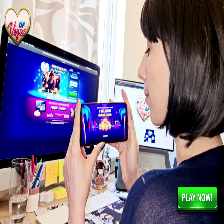

****************************


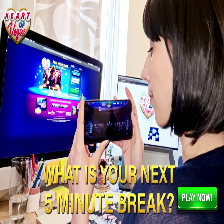

****************************


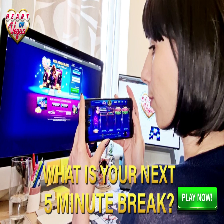

****************************


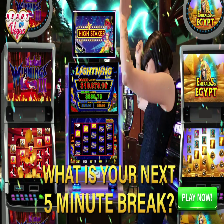

****************************


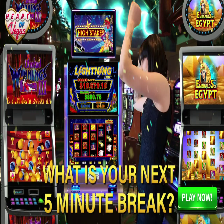

****************************


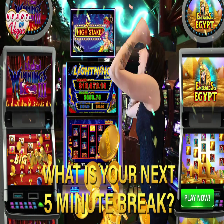

****************************


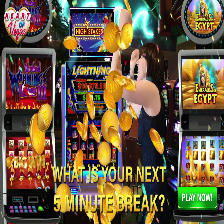

****************************


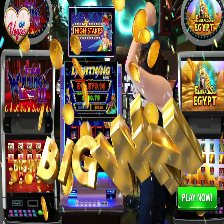

****************************


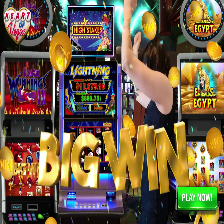

****************************


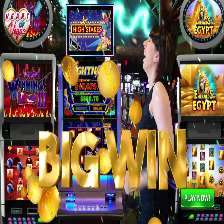

****************************


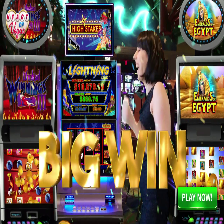

****************************


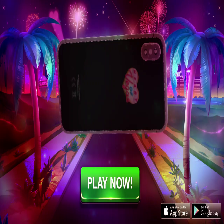

****************************


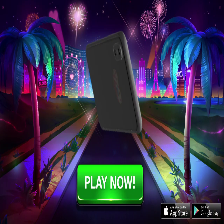

****************************


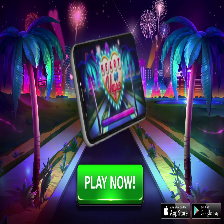

****************************


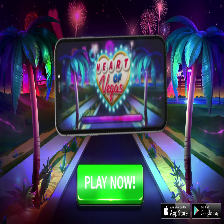

****************************


In [211]:
from google.colab.patches import cv2_imshow
frames = []
count = 0

path = "/content/gdrive/MyDrive/BLKBOX_VIDEO/video/HoV_CreativeWorkshopConcept1Liveaction_V33388_7_English_Landscape&IMG=P.mp4"
cap = cv2.VideoCapture(path)

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("The total frames in the video is :",length)
temp = length / No_of_frames

ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        img = cv2.resize(img, (224, 224))
        frames.append(img)
        cv2_imshow(img)
        print("****************************")
        count += temp
        cap.set(1,count)
    else:
      cap.release()
      break

video = np.stack(frames, axis=0)

In [212]:
video.shape

(15, 224, 224, 3)

In [213]:
# extract the images features

imgs_features = feat_extractor.predict(video)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(15, 1920)

In [214]:
flatten_img_features = imgs_features.flatten()
flatten_img_features.shape

(28800,)

The total frames in the video is : 900


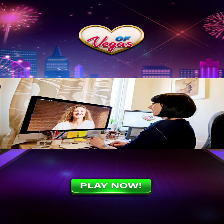

****************************


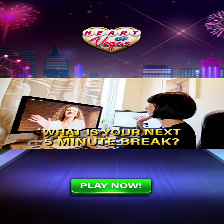

****************************


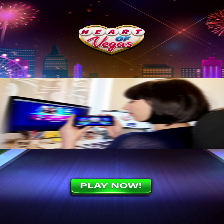

****************************


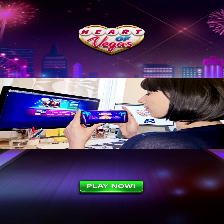

****************************


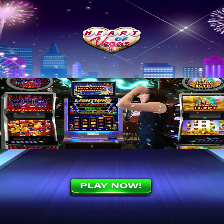

****************************


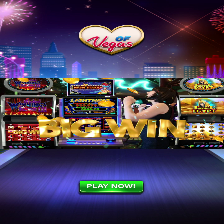

****************************


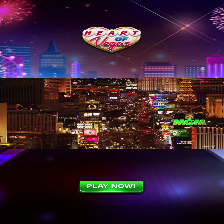

****************************


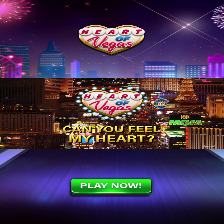

****************************


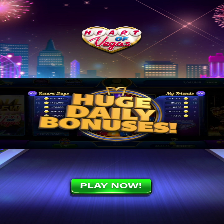

****************************


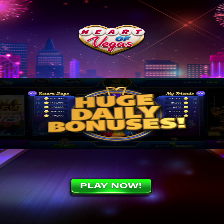

****************************


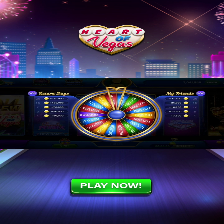

****************************


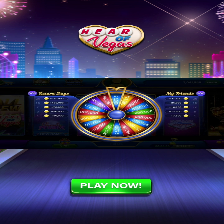

****************************


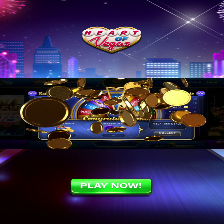

****************************


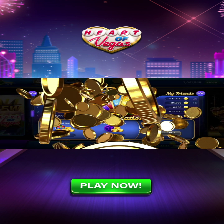

****************************


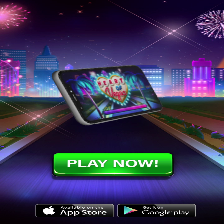

****************************


In [215]:
frames = []
count = 0

path = "/content/gdrive/MyDrive/BLKBOX_VIDEO/video/HoV_CreativeWorkshopConcept1Liveaction_V33399_30_English_Portrait&IMG=P.mp4"
cap = cv2.VideoCapture(path)

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("The total frames in the video is :",length)
temp = length / No_of_frames

ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        img = cv2.resize(img, (224, 224))
        frames.append(img)
        cv2_imshow(img)
        print("****************************")
        count += temp
        cap.set(1,count)
    else:
      cap.release()
      break

video = np.stack(frames, axis=0)

In [216]:
video.shape

(15, 224, 224, 3)

In [217]:
# extract the images features

imgs_features = feat_extractor.predict(video)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(15, 1920)

In [218]:
flatten_img_features1 = imgs_features.flatten()
flatten_img_features1.shape

(28800,)

In [219]:
import scipy

ml = max(len(flatten_img_features),len(flatten_img_features1))
A = np.concatenate((flatten_img_features , np.zeros(ml-len(flatten_img_features))))
B = np.concatenate((flatten_img_features1 , np.zeros(ml-len(flatten_img_features1))))
from scipy.spatial import distance as dis
result = dis.euclidean(A,B)
result2 = 1 - dis.cosine(A,B)
result3 = dis.jaccard(A,B)

print(result)
print(result2)
print(result3)

799.9647198062199
0.7928920297737868
1.0


In [220]:
print(A.shape)
print(B.shape)

(28800,)
(28800,)


In [221]:
A = np.expand_dims(A,axis = 0)
B = np.expand_dims(B,axis = 0)
print(A.shape)

(1, 28800)


In [222]:
arr = np.concatenate((A, B), axis=0)
arr.shape

(2, 28800)

In [223]:
cosSimilarities = cosine_similarity(arr)

In [224]:
cosSimilarities

array([[1.        , 0.79289203],
       [0.79289203, 1.        ]])